**<center> <span style="color:crimson;font-family:serif; font-size:32px;"> NETFLIX MOVIES AND TV SHOWS EDA 📊</span> </center>**

### DATASET :
**Name** : Netflix Movies and TV Shows ( Listings of movies and tv shows on Netflix )

**About** : Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Dataset Link** : https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download

#### **1. Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

#### **2. Quick look at the Data**

In [2]:
# loading data
main_df = pd.read_csv("netflix_titles.csv")
main_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
main_df.shape

(8807, 12)

The dataset has 8807 rows and 12 columns, with features:
* show_id: unique id of each show 
* type: The category of a show, can be either a Movie or a TV Show
* title: Name of the show
* director: Name of the director(s) of the show
* cast: Name of actors and other cast of the show
* country: Name of countries the show is available to watch on Netflix
* date_added: Date when the show was added on Netflix
* release_year: Release year of the show
* rating: Show rating on netflix
* duration: Time duration of the show
* listed_in: Genre of the show
* description: Some text describing the show

#### **3. Visualizing missing values**

<AxesSubplot: >

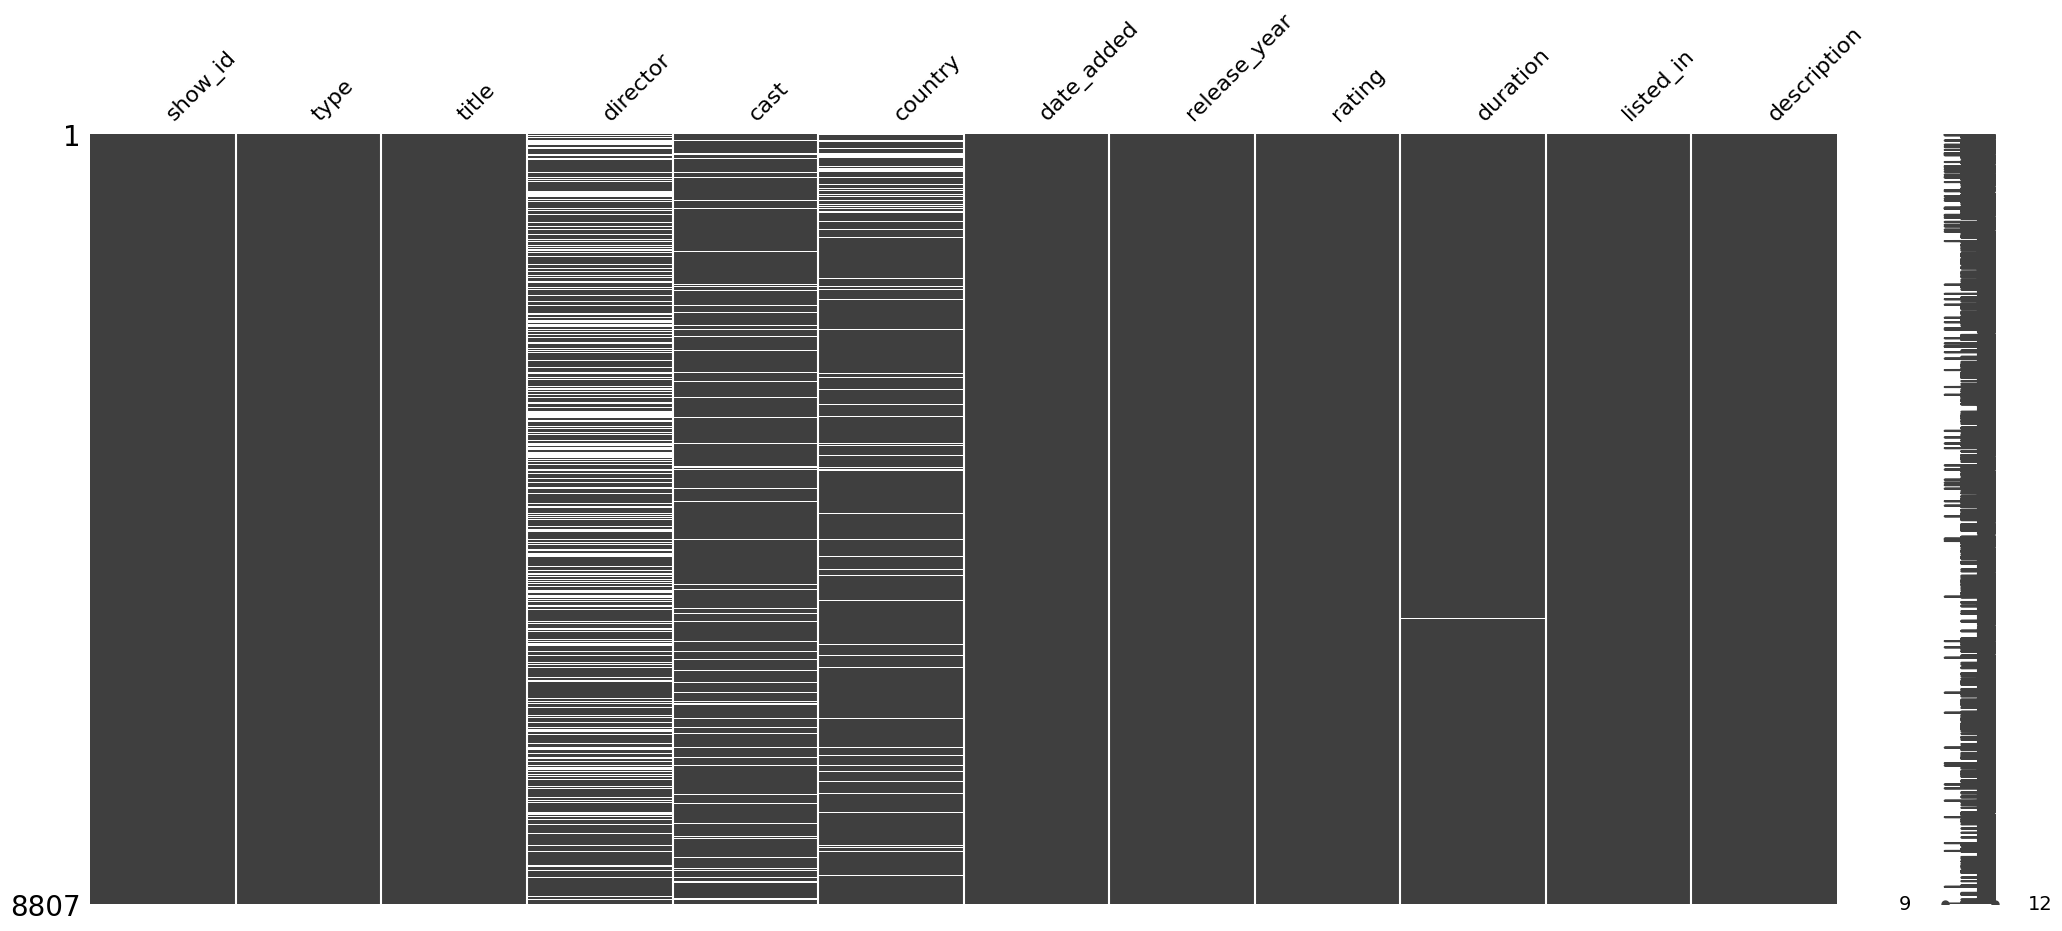

In [5]:
# Visualizing the missing values as a Matrix
msno.matrix(main_df)

* Using this matrix we can very quickly find the pattern of missingness in the dataset.
* From the above visualisation we can observe that "director" has a peculiar pattern that stands out."cast" and "country" have a similar pattern of missing values while column "duration" shows a different pattern.**

<AxesSubplot: >

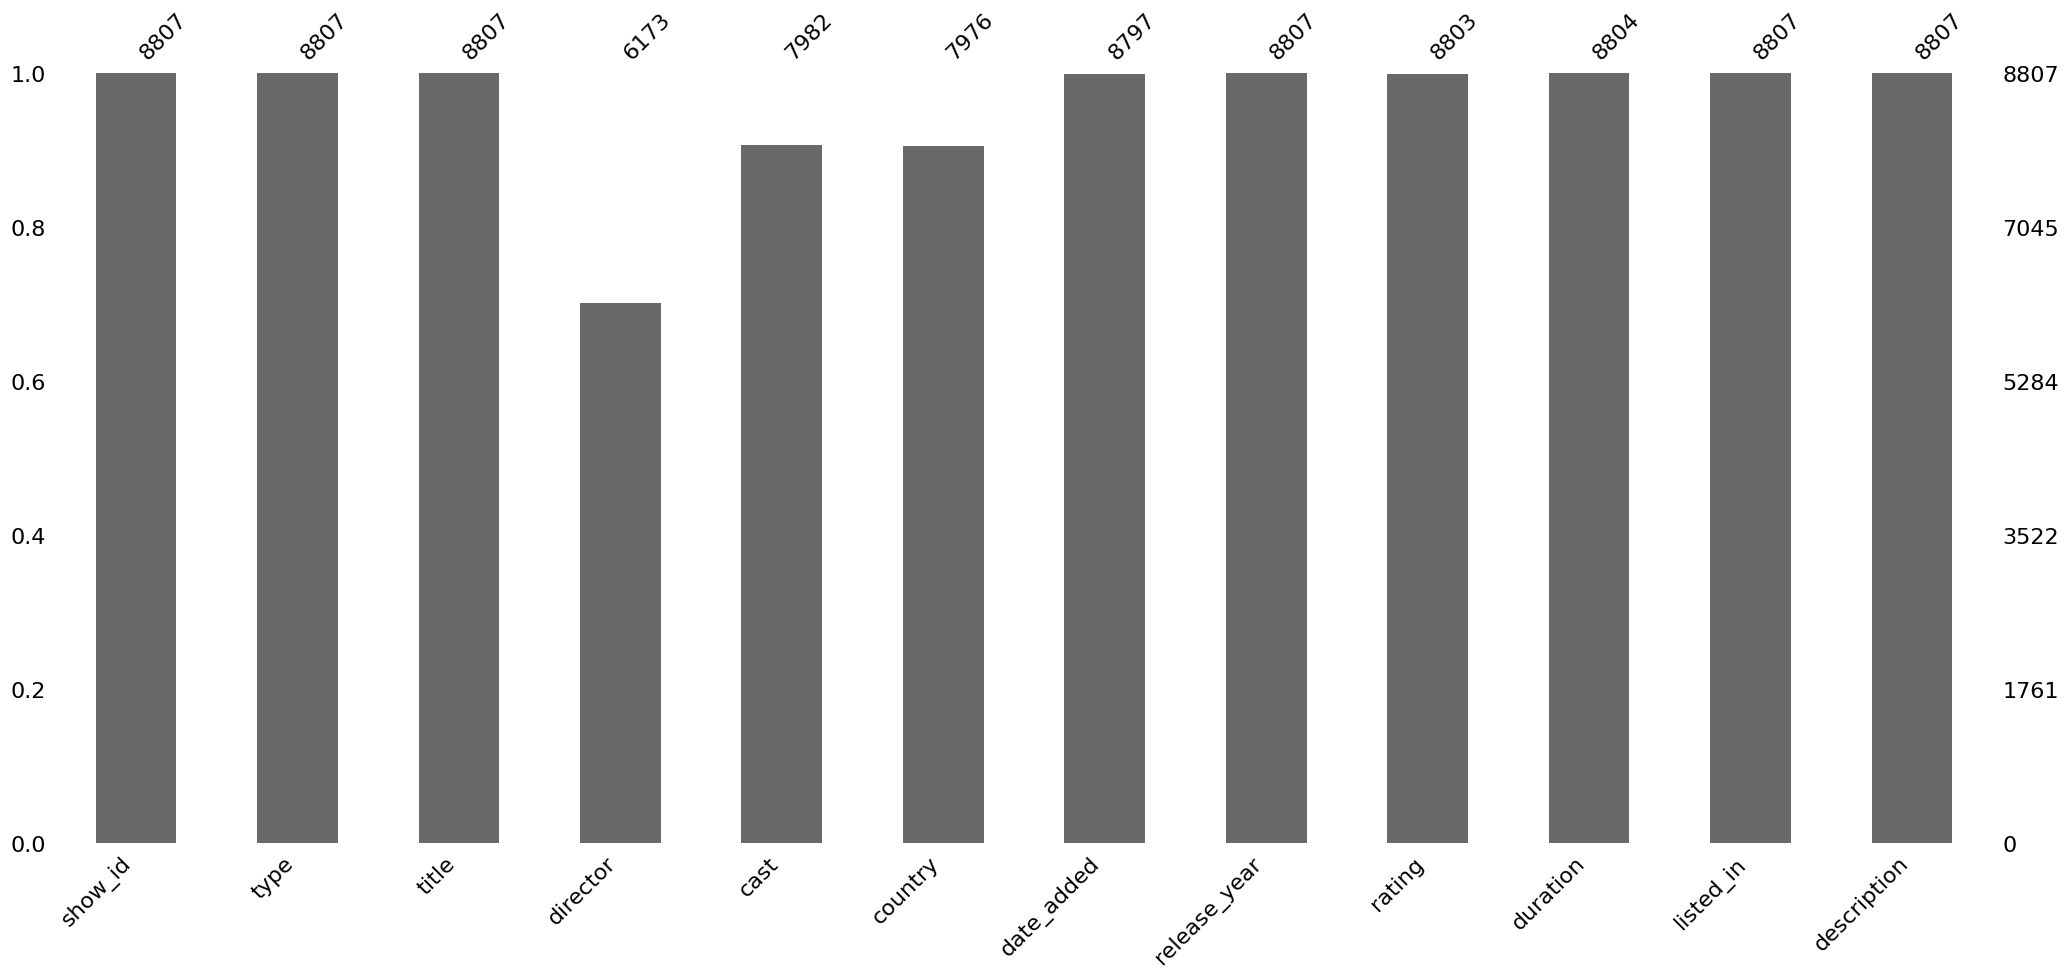

In [6]:
# Visualize the number of missing values as a bar chart
msno.bar(main_df)

* This bar chart gives us an idea about how many missing values are there in each column.
* "director" has the most missing value followed by "cast" and "country". There are few missing value in "date_added" and "rating".

<AxesSubplot: >

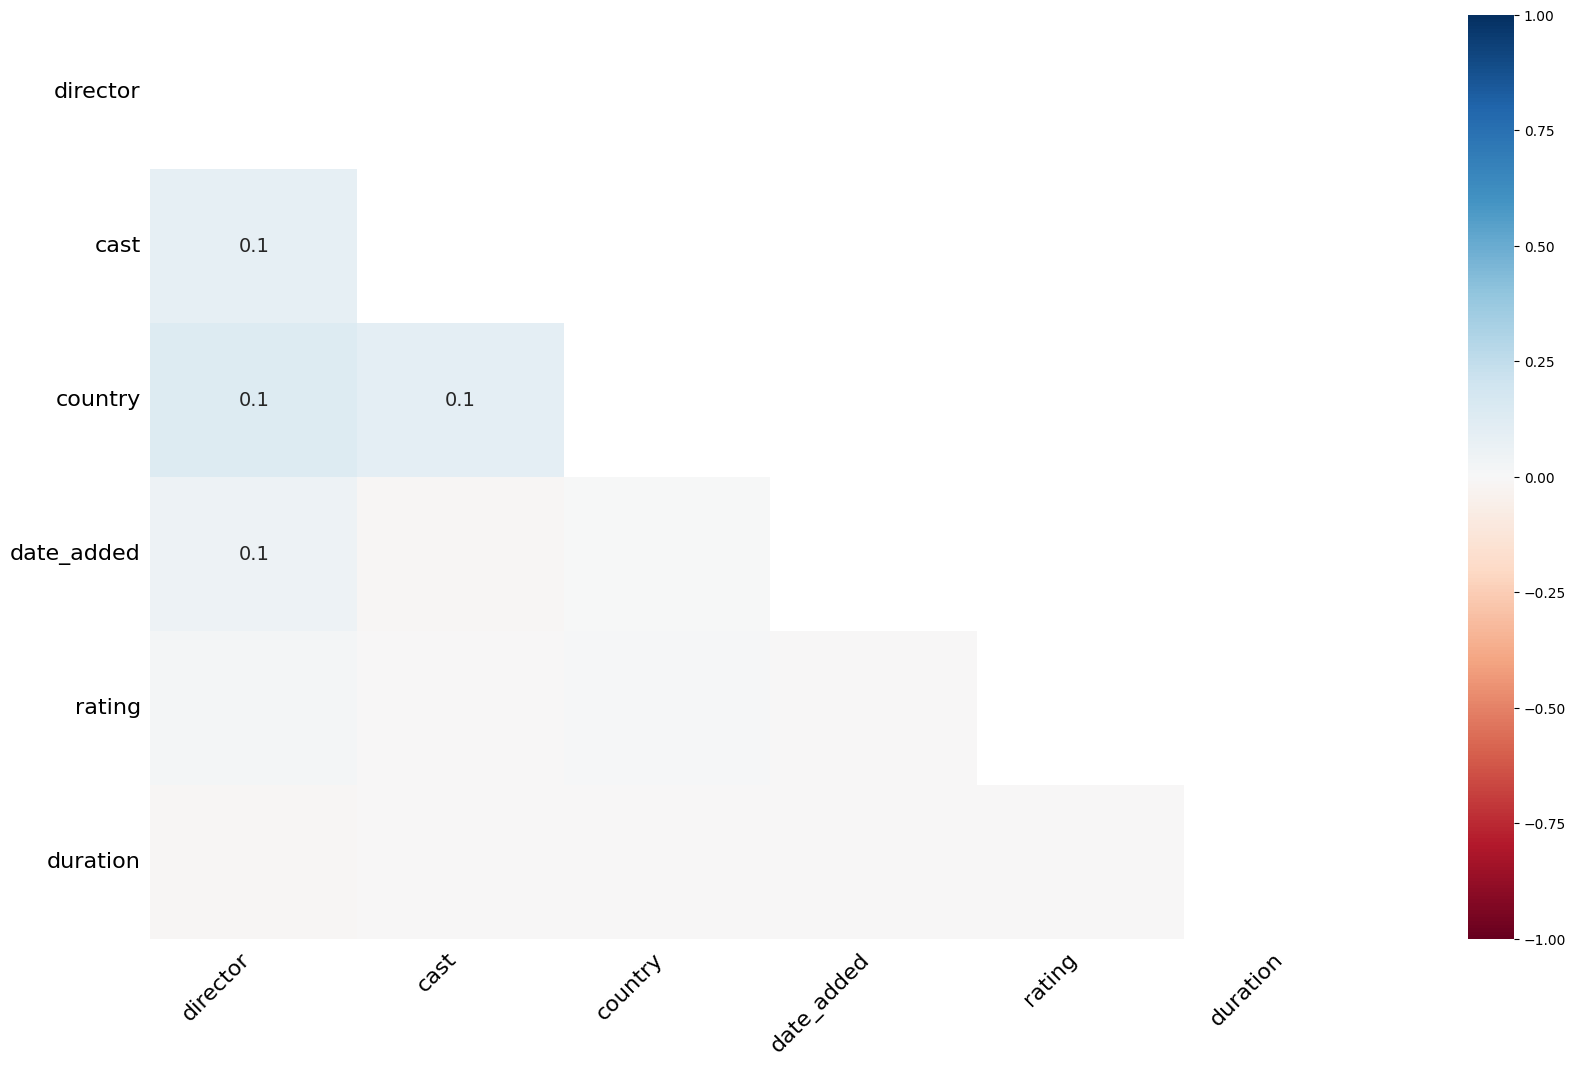

In [7]:
# Visualizing the correlation between the number of missing values in different columns as a heatmap
msno.heatmap(main_df)

Heatmap shows the correlation of missingness between every 2 columns. A value near 0 means there is no dependence between the occurrence of missing values of two variables.

In [8]:
for i in main_df.columns:
    null_rate = main_df[i].isna().sum() / len(main_df) * 100 
    if null_rate > 0 :
        print(f"{i}'s null-rate is {round(null_rate,2)} %")

director's null-rate is 29.91 %
cast's null-rate is 9.37 %
country's null-rate is 9.44 %
date_added's null-rate is 0.11 %
rating's null-rate is 0.05 %
duration's null-rate is 0.03 %


#### **4. Data Cleaning and Preprocessing**

In [9]:
# number of unique elements 
main_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [10]:
# missing values in the dataset 
main_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**The missing values are in:**

* "director": Very less information, not needed for the analysis so I will be dropping this.
* "cast": There are too many diferent values so I will be dropping this column.
* "country": Important variable hence we need to fix this.
* "date_added": There are just a few cases, so lets scrap them.
* "rating": There are just a few cases, so lets scrap them.  
* "duration" : There are just a few cases, so lets scrap them.  

In [11]:
# Fixing the missing rating
main_df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [12]:
print(main_df["rating"].value_counts())

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64


In [13]:
main_df[main_df["rating"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


Since there are only 4 missing values for "ratings", let's replace them with the category having the most occurences - 'TV-MA'.

In [14]:
main_df.loc[main_df['show_id'] == 's5990', 'rating'] = 'TV-MA'
main_df.loc[main_df['show_id'] == 's6828', 'rating'] = 'TV-MA'
main_df.loc[main_df['show_id'] == 's7313', 'rating'] = 'TV-MA'
main_df.loc[main_df['show_id'] == 's7538', 'rating'] = 'TV-MA'

main_df[main_df['show_id'].isin(['s5990','s6828','s7313','s7538'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,TV-MA,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,TV-MA,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,TV-MA,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,TV-MA,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [15]:
main_df["rating"].isna().sum()

0

Hence, the "rating" for missing values has been fixed.

In [16]:
# dropping the "director" and "cast" columns
main_df = main_df.drop(['director', 'cast'], axis= 1)
main_df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [17]:
# fixing the "date_added" column missing values
main_df['date_added'].isna().sum()

10

Since there are only 10 missing values in date_added, lets drop these.

In [18]:
main_df = main_df[main_df["date_added"].notna()]
main_df['date_added'].isna().sum()

0

In [19]:
# fixing the "country" column missing values
main_df['country'] = main_df['country'].fillna(main_df['country'].mode()[0])

There are some entries where "country" has multiple values, so we add a new column with just the first mentioned country, so that we can check which region has the most productions.

In [20]:
# retriving the first country 
main_df['principal_country'] = main_df['country'].apply(lambda x: x.split(",")[0])
main_df['principal_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: principal_country, dtype: object

As we have only 3 missing values in the "duration" column let's just drop those rows.

In [21]:
# fixing the "duration" column missing values
main_df = main_df.dropna(subset=['duration'])

Now, let's check the clen data.

In [22]:
main_df.isna().sum()

show_id              0
type                 0
title                0
country              0
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
principal_country    0
dtype: int64

The dataset now doesn't have any missing values, so we can proceed.

#### **5. Feature Engineering**

Generating new columns "year_added" and "month_added" from the "date_added" columns.

In [23]:
main_df["year_added"] = main_df['date_added'].apply(lambda x: x.split(" ")[-1])
print(main_df['year_added'].nunique())
print(sorted(main_df['year_added'].unique()))

14
['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


In [24]:
main_df["month_added"] = main_df['date_added'].apply(lambda x : x.split(" ")[0])
print(main_df['month_added'].tail())

8802    November
8803        July
8804    November
8805     January
8806       March
Name: month_added, dtype: object


Making Targets based on the "rating" column values:

In [25]:
main_df['rating'].value_counts()

TV-MA       3209
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [26]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
main_df['target_ages'] = main_df['rating'].replace(ratings_ages)
main_df['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

As we can see ratings {74 min, 84 min, 66 min} have only one occurence, so let's drop them.

In [27]:
main_df = main_df.loc[~main_df["target_ages"].isin(["74 min", "84 min", "66 min"])]

Now, let's fix some datatypes.

In [28]:
# type should be a category 
main_df['type'] = pd.Categorical(main_df['type'])

# target_ages should also be a category, it has 4 classes
main_df['target_ages'] = pd.Categorical(main_df['target_ages'], categories= ['Teens', 'Adults', 'Older Kids', 'Kids'])

# year should be an integer so that we can compare it with "released_year"
main_df['year_added'] = pd.to_numeric(main_df['year_added'])

In [29]:
main_df.dtypes

show_id                object
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
principal_country      object
year_added              int64
month_added            object
target_ages          category
dtype: object

#### **6. Data Visualization and EDA**

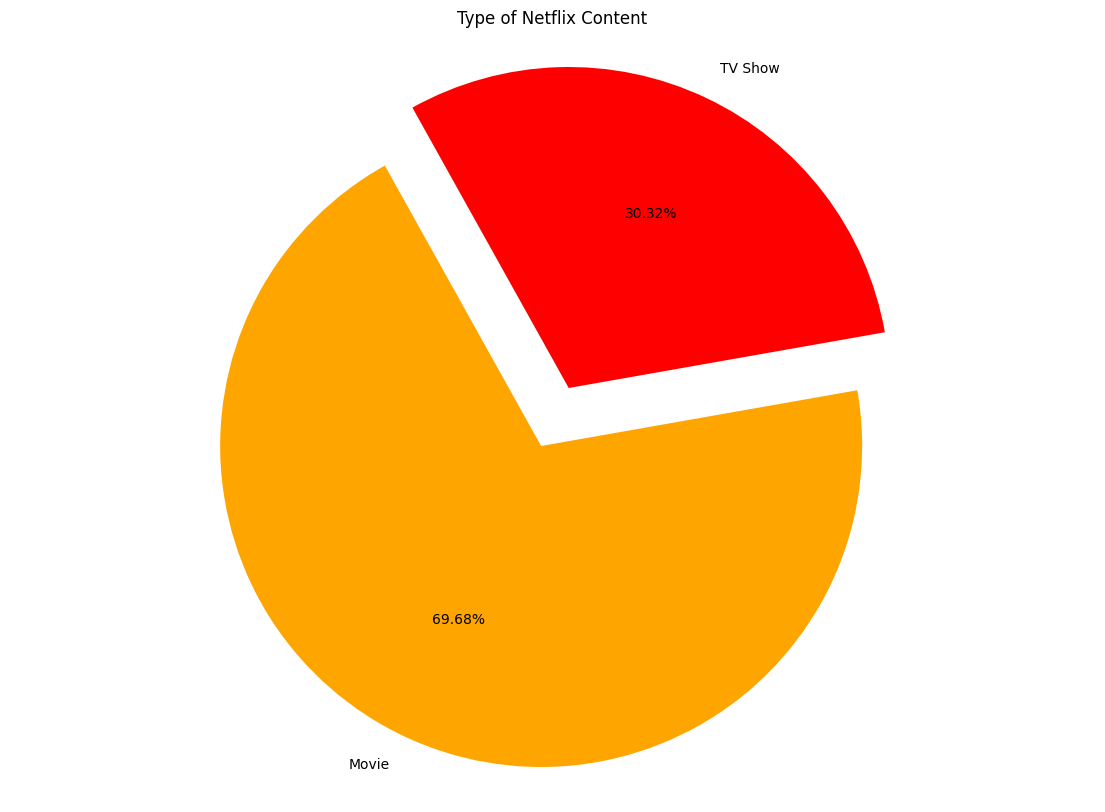

In [30]:
plt.figure(figsize=(14,10))
labels = ["TV Show", "Movie"]
plt.pie(main_df['type'].value_counts().sort_values(), labels=labels, explode=[0.1, 0.1], autopct= '%1.2f%%', colors=['red','orange'], startangle= 10)
plt.title("Type of Netflix Content")
plt.axis("equal")
plt.show()

The above pie chart can be used to conclude that **nearly 2/3rd of the content on netflix consists of Movies and the rest includes TV Shows**.

In [31]:
df_movies = main_df[main_df["type"] == "Movie"]
df_tv = main_df[main_df["type"] == "TV Show"]

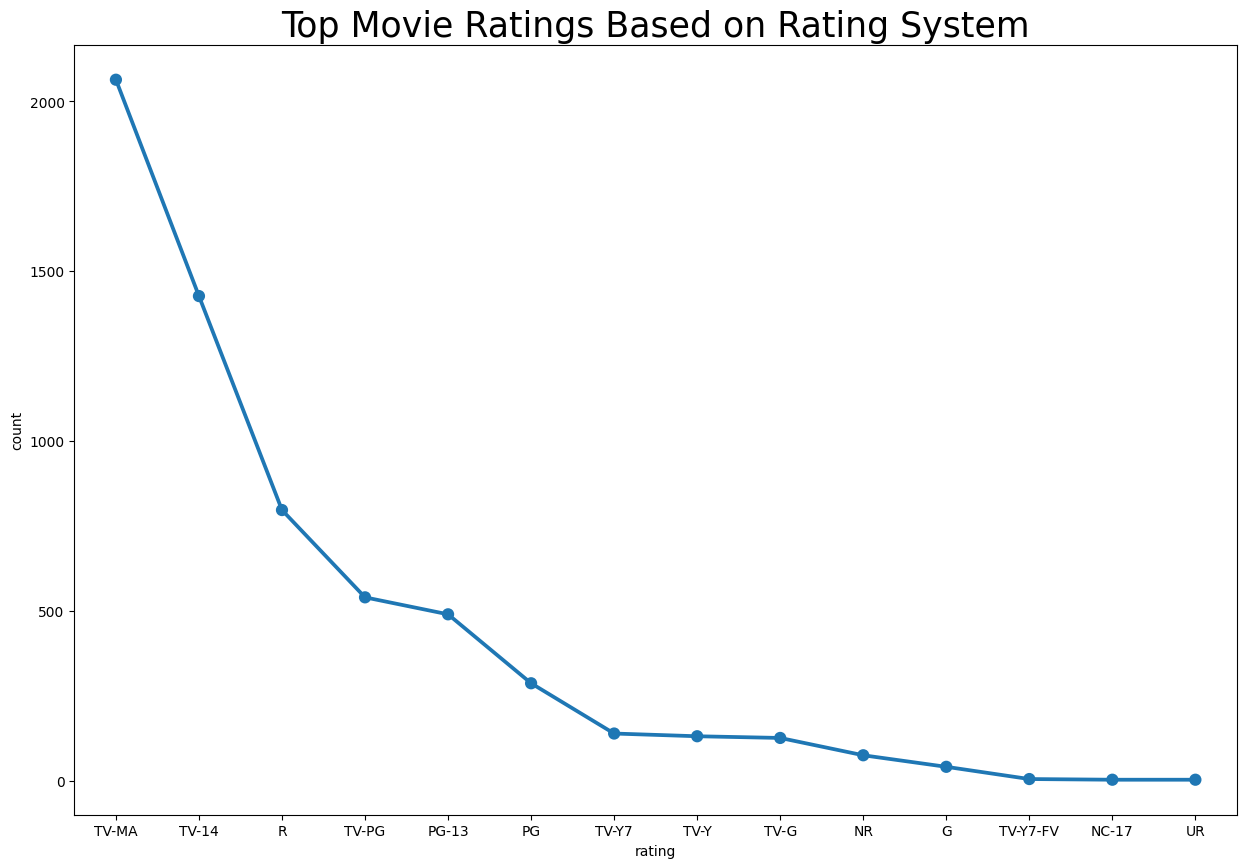

In [32]:
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)
fig_dims = (15,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating', y='count', data=movie_ratings)
plt.title("Top Movie Ratings Based on Rating System", size = 25)
plt.show()

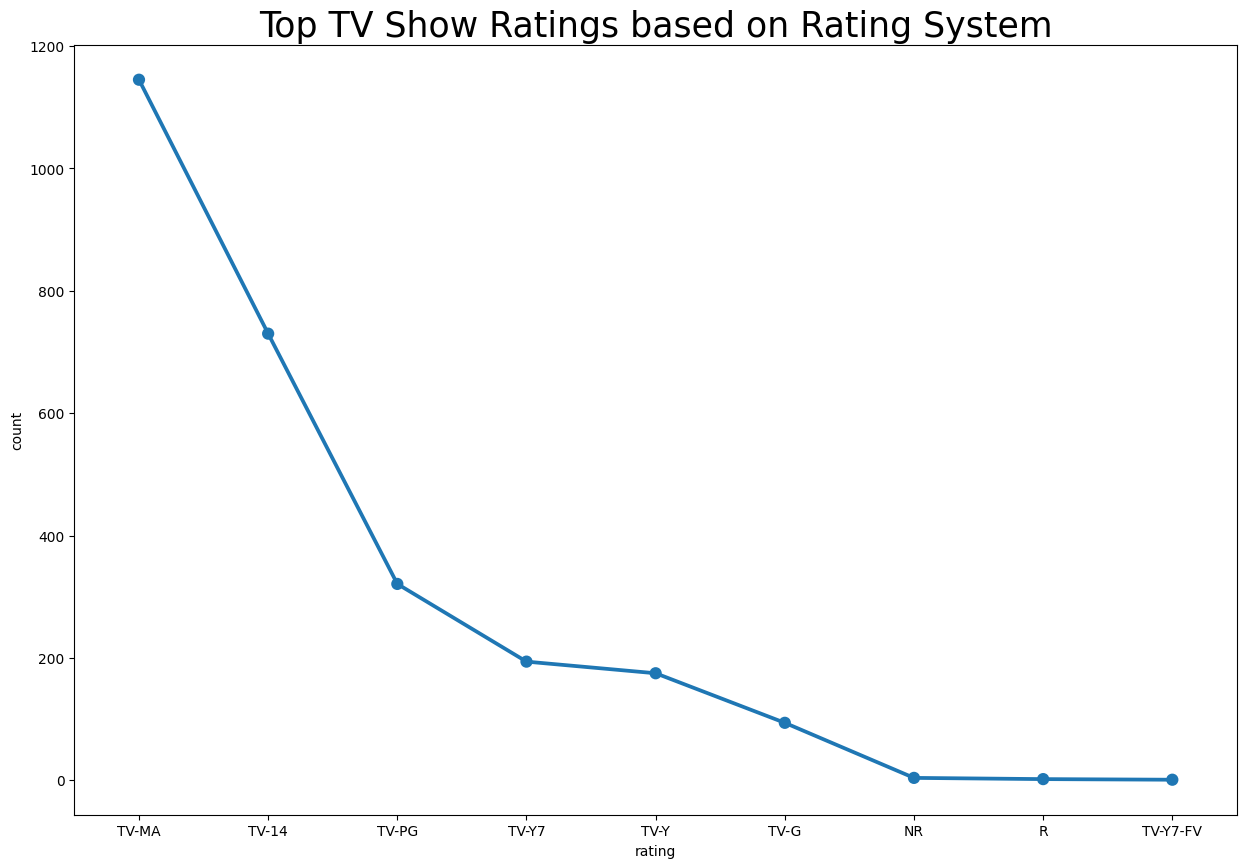

In [33]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)
fig_dims = (15,10)
fig, ax = plt.subplots(figsize = fig_dims)
sns.pointplot(x='rating', y='count', data=tv_ratings)
plt.title("Top TV Show Ratings based on Rating System", size = 25)
plt.show()

In [34]:
def generate_rating_df(main_df):
    ratings_df = main_df.groupby(['rating', 'target_ages']).agg({'show_id' : 'count'}).reset_index()
    ratings_df = ratings_df[ratings_df['show_id'] != 0]
    ratings_df.columns = ['rating', 'target_ages', 'counts']
    ratings_df = ratings_df.sort_values('target_ages')
    return ratings_df

In [35]:
ratings_df = generate_rating_df(main_df)
ratings_df.head(10)

,rating,target_ages,counts
16,PG-13,Teens,490
24,TV-14,Teens,2157
5,NC-17,Adults,3
9,NR,Adults,79
21,R,Adults,799
33,TV-MA,Adults,3209
53,UR,Adults,3
14,PG,Older Kids,287
38,TV-PG,Older Kids,861
46,TV-Y7,Older Kids,333


In [36]:
fig = px.bar(ratings_df, x='rating', y='counts', color='target_ages', title='Ratings of Movies and TV Shows based on Target Age Groups', labels={'counts':'COUNT', 'rating' : 'RATING', 'target_ages' : 'TARGET AGE GROUPS'})
fig.show()

In [37]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_ratings = df_movies['rating'].value_counts()[rating_order_movie]
tv_ratings = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)

def rating_barplot(data, title, height, h_lim = None):
    fig, ax = plt.subplots(1,1, figsize=(15,7))
    if h_lim:
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data, color="#d0d0d0", width=0.5, edgecolor= 'black')

    color = ['green', 'blue', 'orange', 'red']
    span_range = [[0,2], [3,6], [7,8], [9,11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                xy=(sum(span_range[idx])/2, height),
                xytext=(0,0), textcoords='offset points',
                va='center', ha='center',
                color='w', fontsize=16, fontweight='bold',
                bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], 
                alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4, span_range[idx][1]+0.4, color=color[idx], alpha=0.2)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

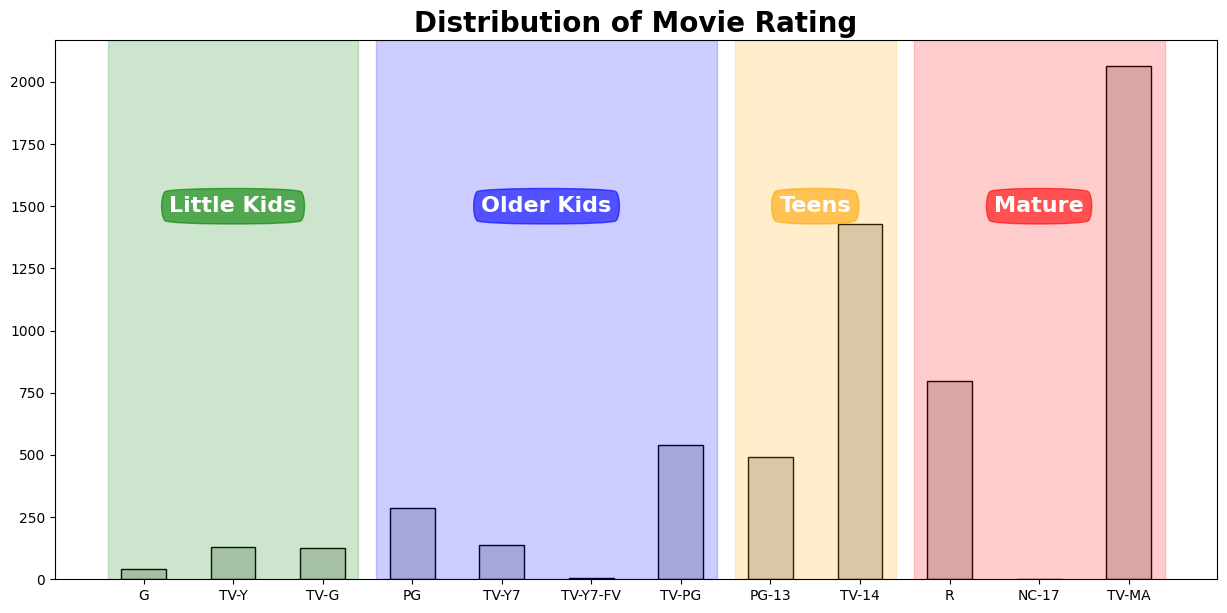

In [38]:
rating_barplot(movie_ratings,'Movie', 1500)

From the above bar graph we can conclude that there are less movies for kids as compared to movies for teens and adult/mature audience.

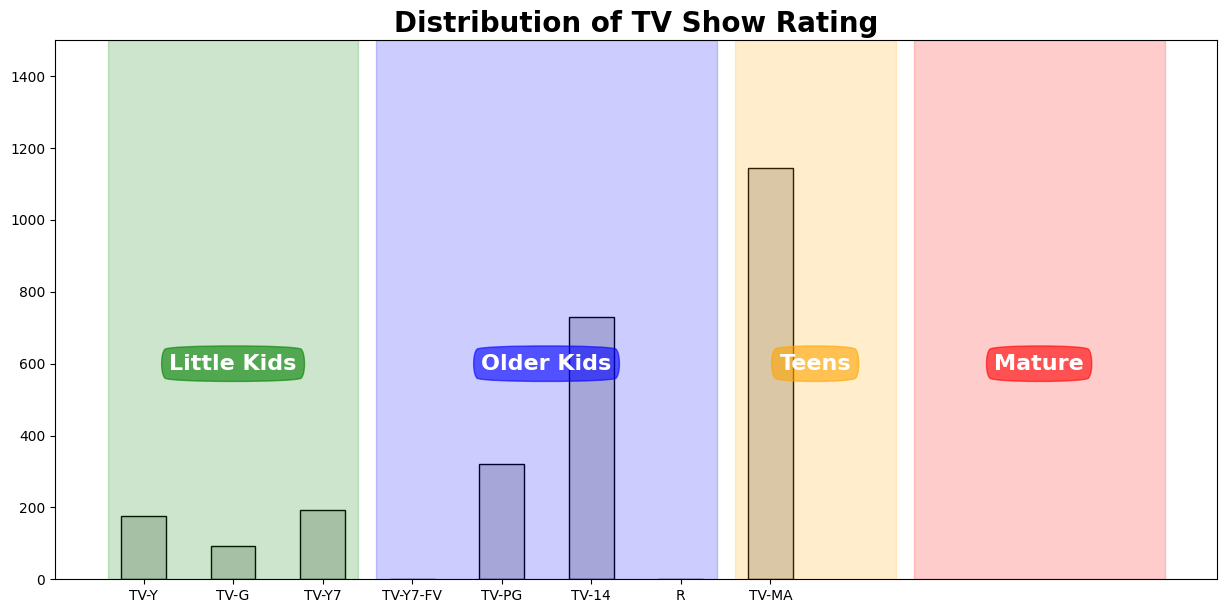

In [39]:
rating_barplot(tv_ratings,'TV Show' , 600, 1500)

Hence, we can observe that TV Shows are mostly for kids and teens.

In [40]:
df_content = main_df['year_added'].value_counts().reset_index().rename(columns={'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))

df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns={'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))

df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns={'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))

t1 = go.Scatter(x=df_content['year_added'], y=df_content['count'], name='Total Contents', marker=dict(color="red"))
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1['count'], name="TV Shows", marker=dict(color='green'))
t3 = go.Scatter(x=df_movies1['year_added'], y=df_movies1['count'], name="Movies", marker=dict(color='blue'))

data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.5, y=1.3, orientation="v"))
fig = go.Figure(data, layout=layout)
fig.show()

Findings from the above plot:
* The growth in number of movies on Netflix is much higher than that of TV shows.
* About 1200 new movies were added in both 2018 and 2019.
* Rapid growth in content started from 2015.

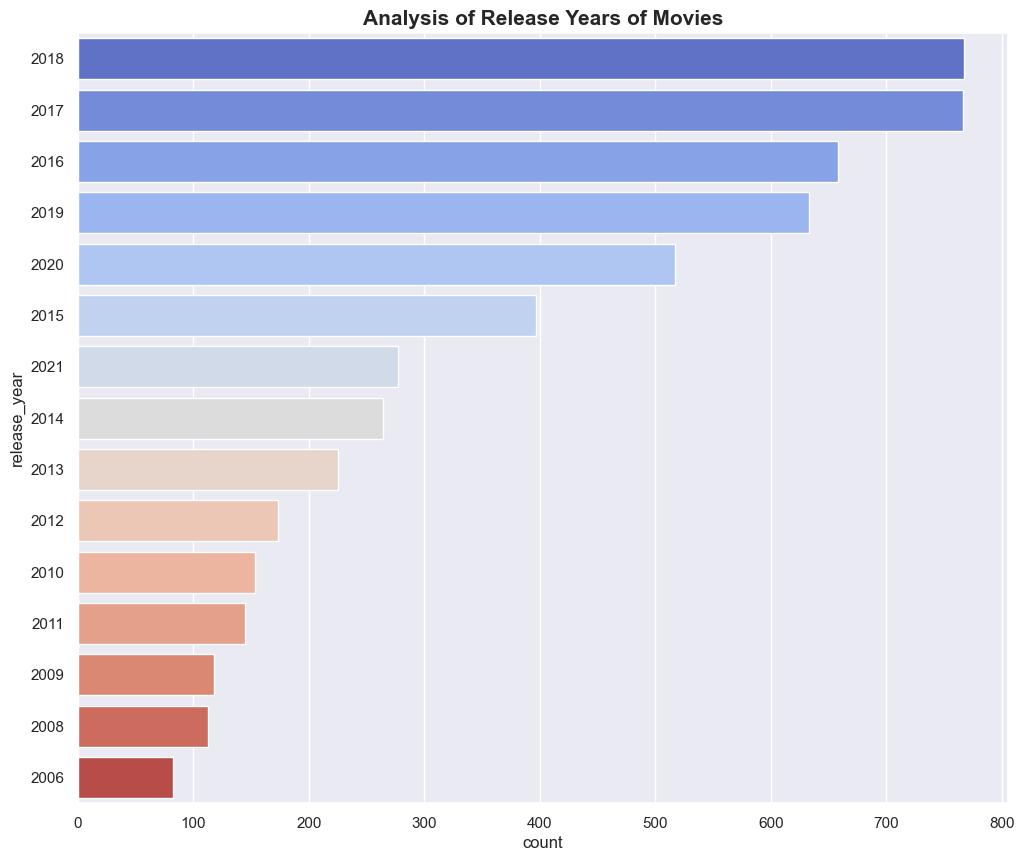

In [41]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year', data=df_movies, palette="coolwarm", order=df_movies['release_year'].value_counts().index[0:15])

plt.title('Analysis of Release Years of Movies', fontsize=15, fontweight='bold')
plt.show()

We observe that **most of the movies were released in the year 2018 and 2017** followed by 2016 and 2019.

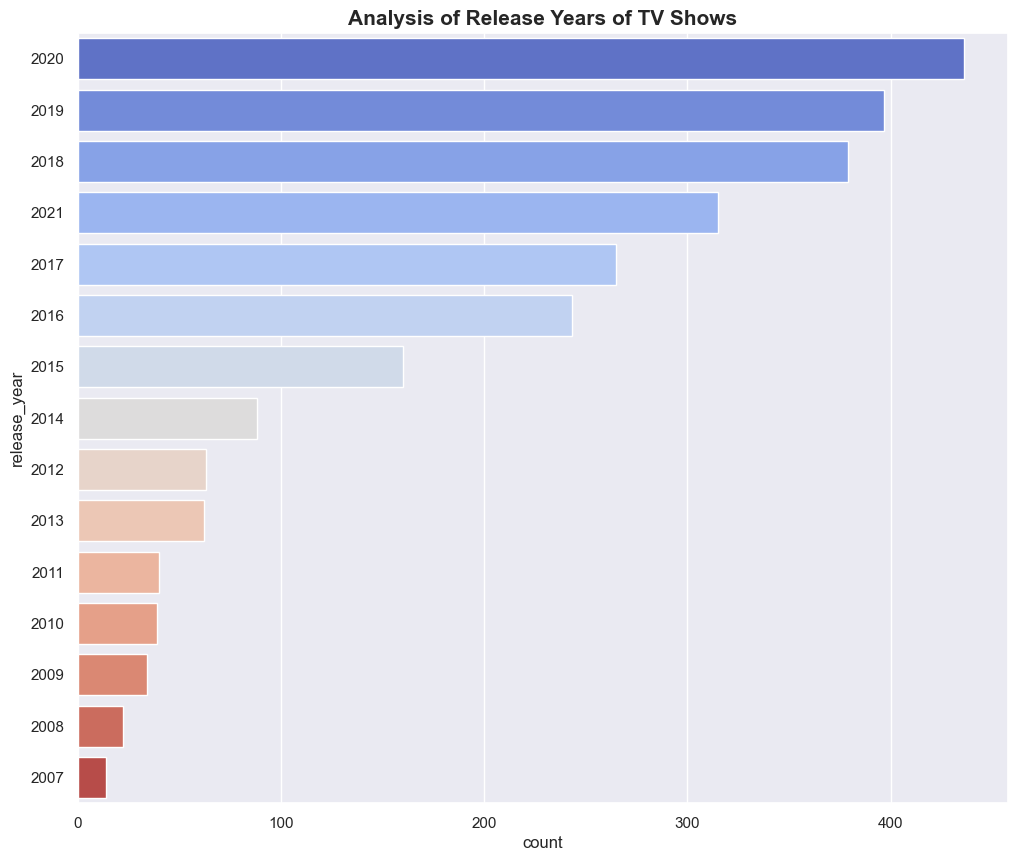

In [42]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year', data=df_tv, palette="coolwarm", order=df_tv['release_year'].value_counts().index[0:15])

plt.title('Analysis of Release Years of TV Shows', fontsize=15, fontweight='bold')
plt.show()

We observe that **most of the TV Shows were released in the year 2020 and 2019** followed by 2018 and 2021.

**DISTRIBUTION OF MOVIE DURATION**

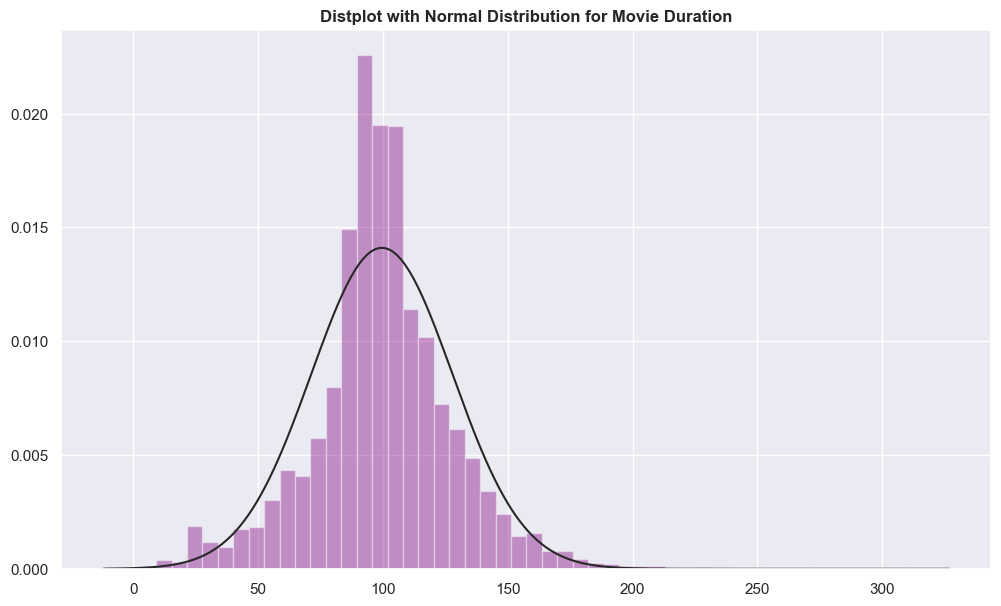

In [43]:
from scipy.stats import norm

plt.figure(figsize=(12,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'), fit=norm, kde=False, color=['purple'])
plt.title('Distplot with Normal Distribution for Movie Duration', fontweight='bold')

plt.show()

From the plot it's evident that majority of the movies have duration ranging from 85 min to 120 min.

In [44]:
fig = px.histogram(x=df_tv['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of TV Show duration",
    xaxis_title = "Duration of TV Shows"
)
fig.show()

Hence, We can say that most TV Shows end by season 3 or 4.

**TOP 10 GENRE in Movies and TV Shows**

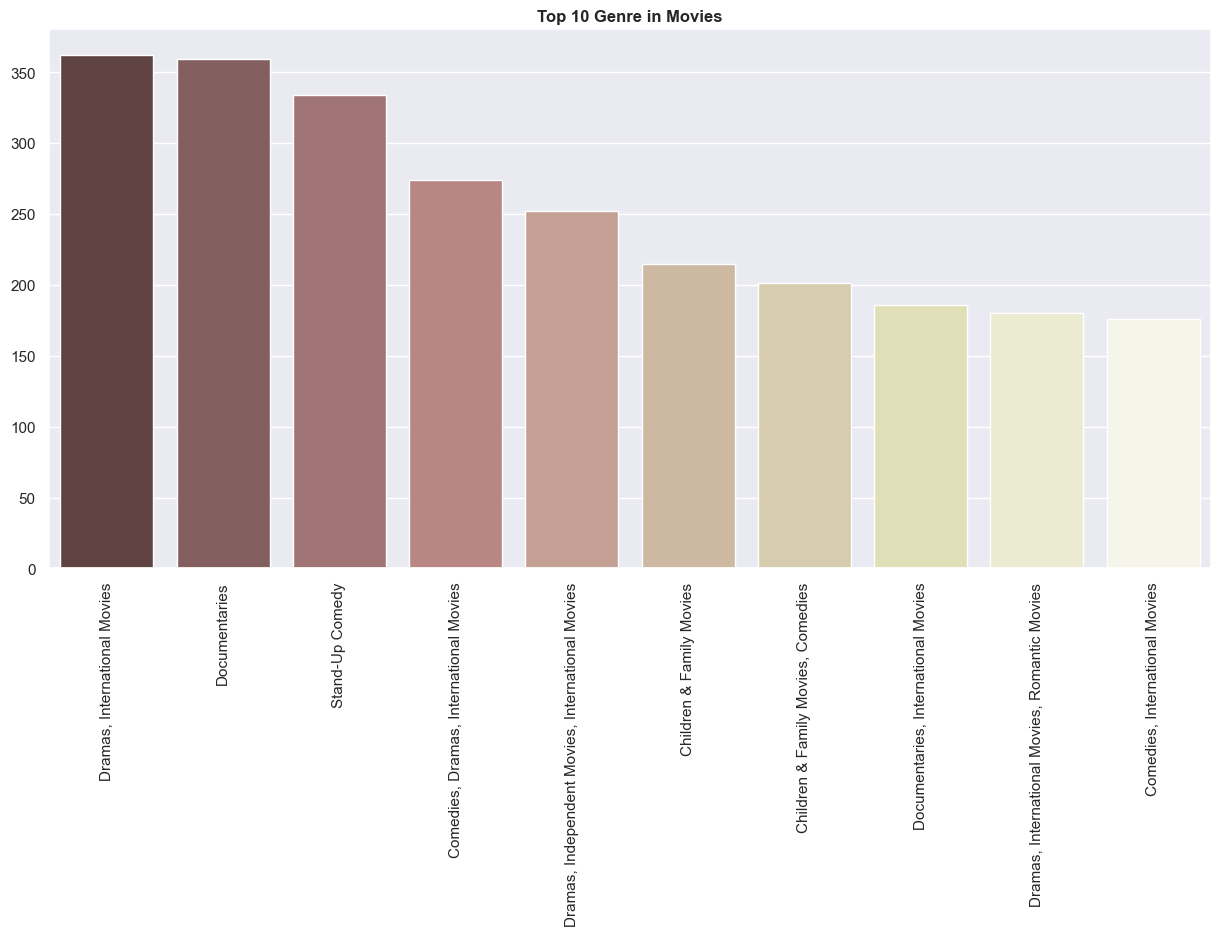

In [45]:
plt.figure(figsize=(15,7))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,
            palette="pink")
plt.xticks(rotation=90)
plt.title("Top 10 Genre in Movies", fontweight="bold")
plt.show()

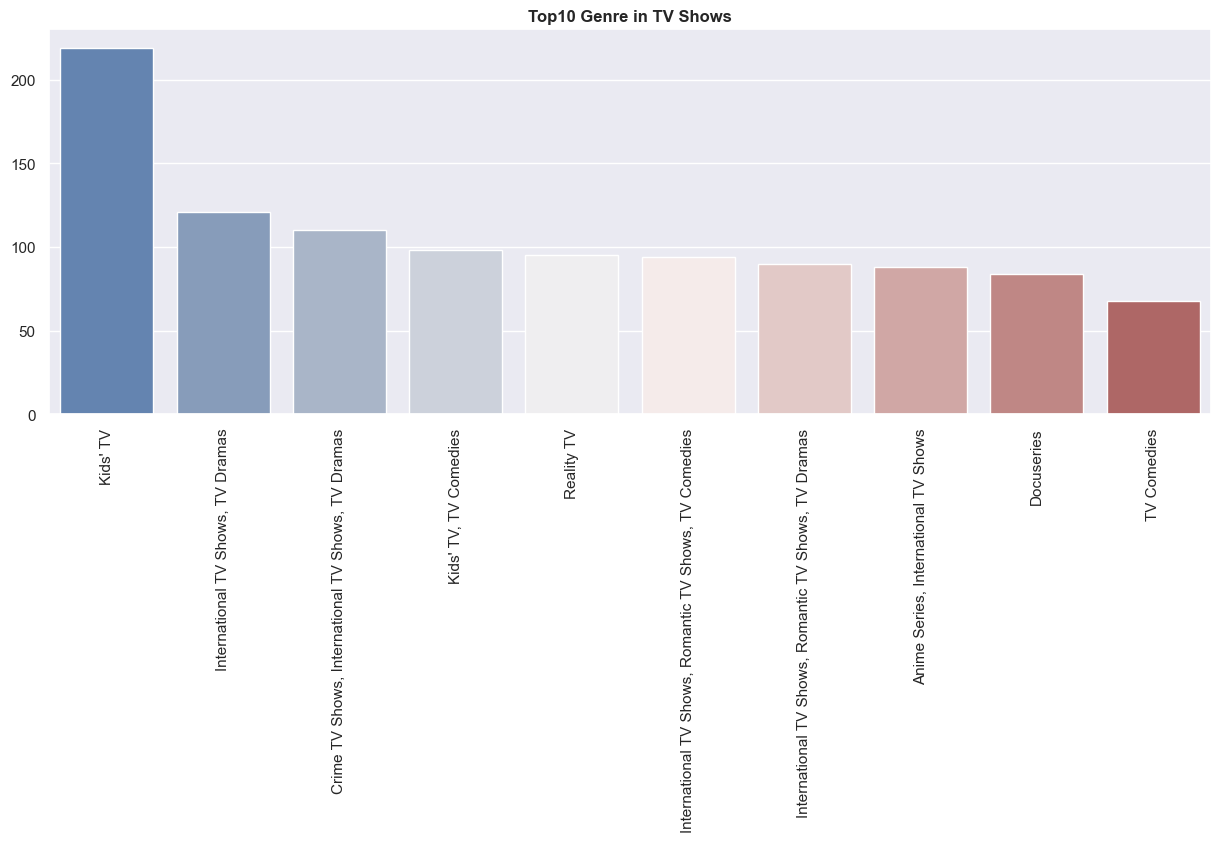

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=90)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

**TOP 20 COUNTRIES PRODUCING MOST CONTENTS**

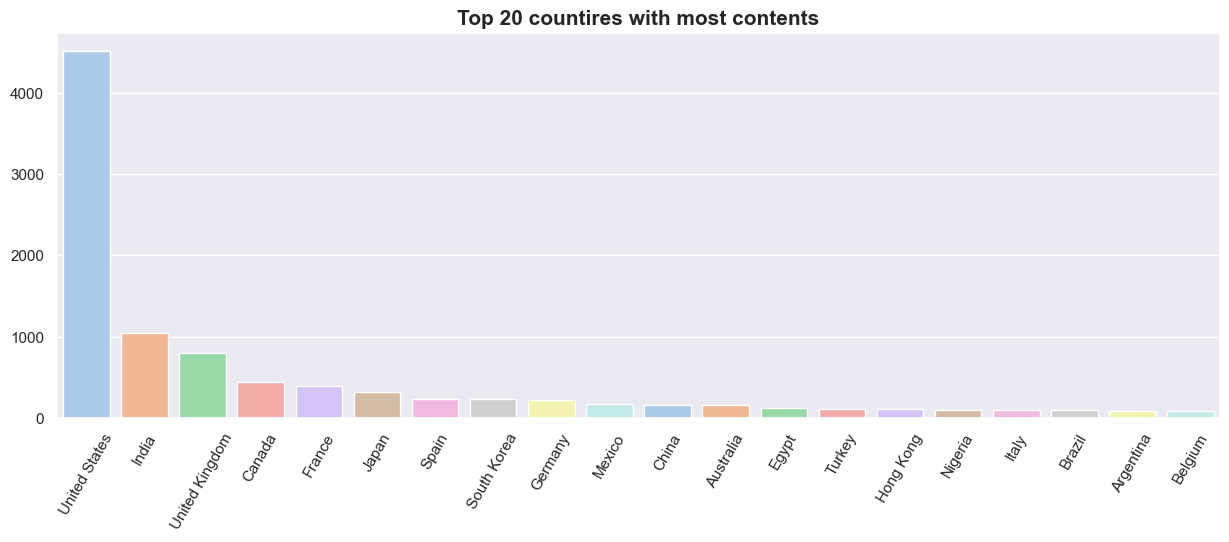

In [47]:
from collections import Counter 
country_data = main_df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
top_20_countries = country_count.head(20)

plt.figure(figsize=(15,5))
sns.barplot(x=top_20_countries.index, y=top_20_countries, palette='pastel')
plt.xticks(rotation=60)
plt.title('Top 20 countires with most contents', fontsize=15, fontweight='bold')
plt.show()

The above bargraph depicts that United States produces the most amount of content, which is very huge in comparison to the content produced by other countries.

**Movie Genre - WordCloud**

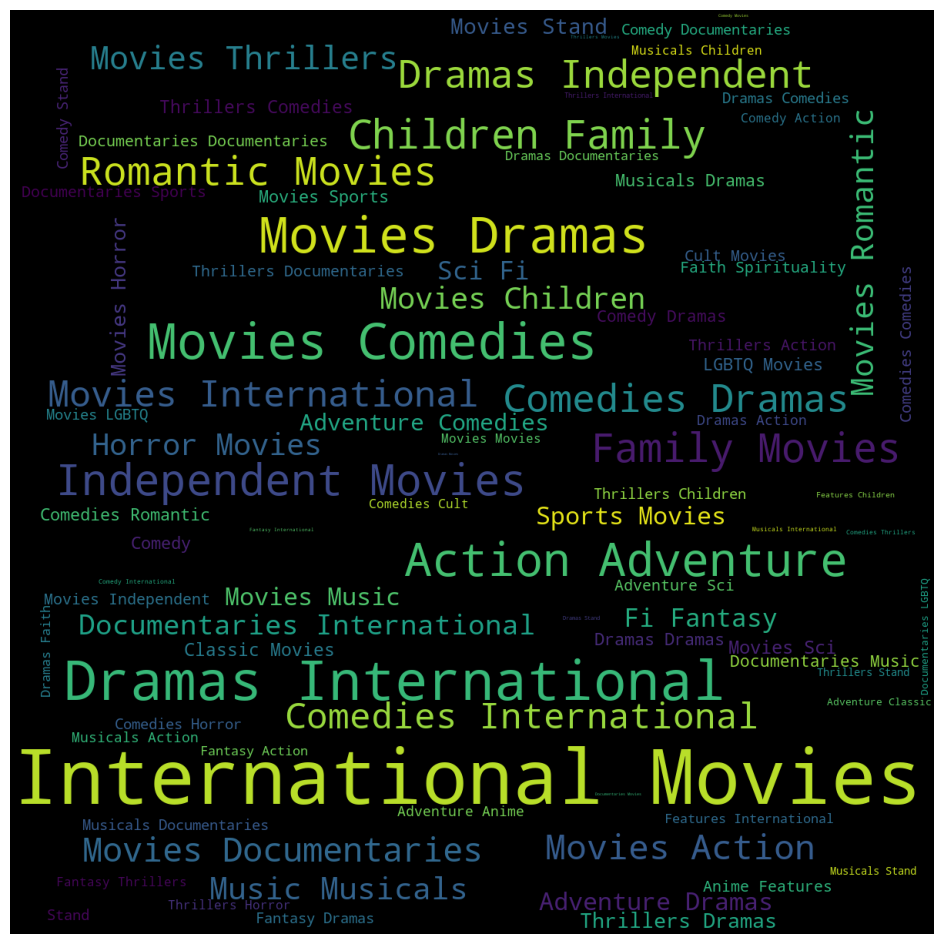

In [48]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color='black', width= 1200, height=1200, max_font_size=120).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**TV Show Genre - WordCloud**

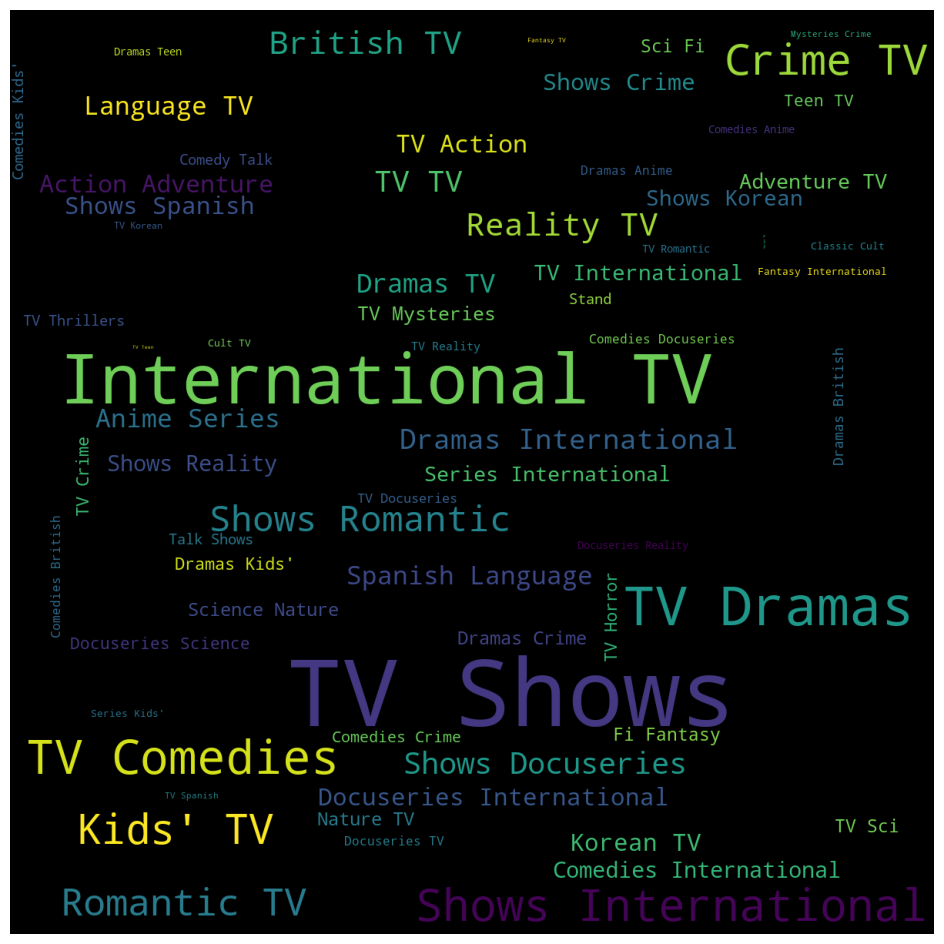

In [49]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color='black', width= 1200, height=1200, max_font_size=121).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()